# INF250 Assignment 1

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

### Task 1

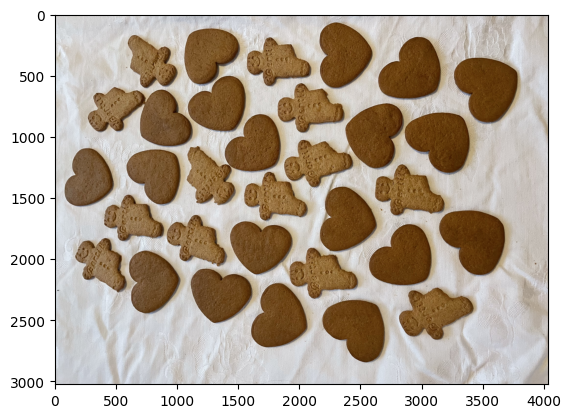

In [5]:
image = io.imread('gingerbread.jpg')
plt.imshow(image);

### Task 2

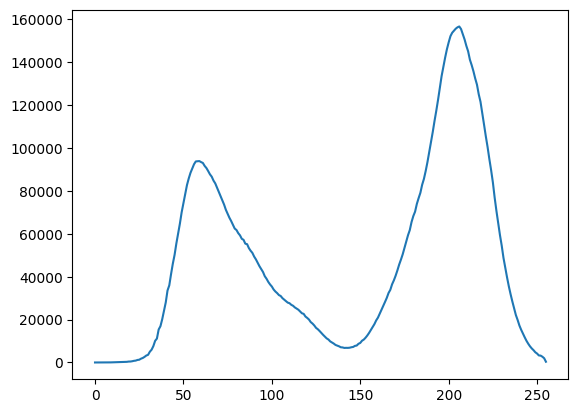

In [ ]:
def histogram(image):
    shape = np.shape(image)
    histogram = np.zeros(256)

    if len(shape) == 3:
        image = image.mean(axis=2)
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')

    histogram = np.zeros(256)
    shape = np.shape(imagemean)
    for i in range(shape[0]):
        for j in range(shape[1]):
            pixval = int(imagemean[i,j])
            histogram[pixval] += 1

    return histogram

image.shape
image_red = image[:,:,0]
imagemean = image.mean(axis=2)

plt.figure()        
plt.plot(histogram(image))
plt.show()

### Task 3

In [8]:
def otsu(image):
    hist = histogram(image)
    num_pixels = np.sum(hist)
    mean_weight = 1.0/num_pixels
    th = 0
    his, bins = np.histogram(image, bins=256, range=(0,256))
    th = -1
    final_value = -1

    for t in range(1, len(bins)-1):
        w0 = np.sum(his[:t]) * mean_weight
        w1 = np.sum(his[t:]) * mean_weight
        
        u0 = np.mean(his[:t]) if w0 > 0 else 0
        u1 = np.mean(his[t:]) if w1 > 0 else 0

        value = w0 * w1 * (u0 - u1) ** 2

        if value > final_value:
            th = t
            final_value = value

    return th

print(otsu(image))

183


### Task 4

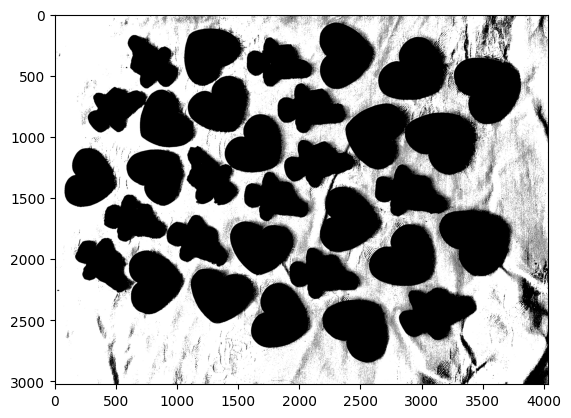

In [9]:
def threshold(image, th=None):
    shape = np.shape(image)
    binarised = np.zeros([shape[0], shape[1]], dtype=np.uint8)

    if len(shape) == 3:
        image = image.mean(axis=2)
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')

    if th is None:
        th = otsu(image)

    binarised = image.copy()
    binarised[binarised < th] = 0
    binarised[binarised >= th] = 255


    return binarised

binarised = threshold(image)
plt.imshow(binarised, cmap='gray');